1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np # N-dimensional array / broadcasting / random numbers
import matplotlib.pyplot as plt # graphs
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy as sp
from scipy import stats
import pandas as pd # DataFrame and label-based slicing
import seaborn as sns  # data visualization
import math

113.26454307090523
45.46571804020683


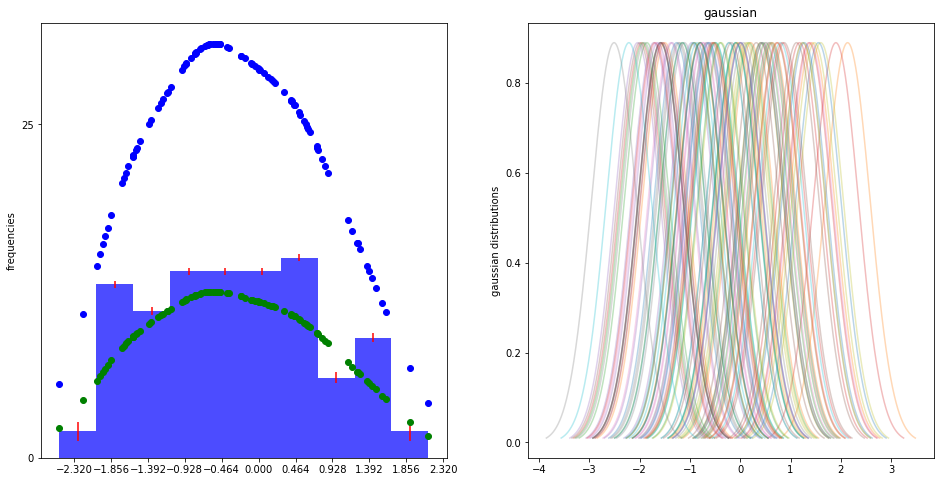

In [4]:
mean,std,N=0,1,100
x=np.random.normal(mean,std,N)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
ax1.set_ylabel('frequencies')
n_bins=10
bin_width=(x.max()-x.min())/n_bins
bin_height, bin_edges, _ = ax1.hist(x, bins=n_bins,label='Histogram', alpha=0.7, color='blue')
central_points = (bin_edges[1:]+bin_edges[:-1])/2
ax1.errorbar(central_points, bin_height, 1/np.sqrt(bin_height), fmt = 'none', label = "Errorbars", ecolor="red")

ax1.yaxis.set_major_locator(MultipleLocator(25))
ax1.xaxis.set_major_locator(MultipleLocator(bin_width))

std_gauss  = 1.06*x.std()*(x.size**(-1/5))

ax2.set_title('gaussian')
ax2.set_ylabel('gaussian distributions')
n=1000
somma=np.zeros((x.size,x.size))
m=0
for i in x:  
    interval=np.linspace(i-3*std_gauss,i+3*std_gauss, n)
    ax2.plot(interval, sp.stats.norm.pdf(interval,loc=i,scale=std_gauss), ls = '-', alpha = 0.3)
    somma[m,:]=sp.stats.norm.pdf(x,loc=i,scale=std_gauss)
    #print(sp.stats.norm.pdf(x,loc=i,scale=std_gauss))
    m +=1
#print(somma)
y=np.sum(somma,axis=0)
tot_interval=np.linspace(x.min(),x.max(),N)
norm_gauss = sp.integrate.trapz(y,tot_interval)
norm_hist = sp.integrate.trapz(bin_height,central_points) 
ax1.plot(x,y,'bo')
ax1.plot(x,y*norm_hist/norm_gauss,'go')
print(norm_gauss)
print(norm_hist)

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/saretta/.wget-hsts'. HSTS will be disabled.
--2018-11-28 15:59:06--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-11-28 15:59:07--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc08174f553becebbce1aad08444.dl.dropboxusercontent.com/cd/0/inline/AWffZ5HIUiBggOqmzODU6m1c5VINGUG5DvRA7fNM5sLUk055nWAVYYY215v0BWTjGwLHY7GjY84FRy8KAHSysw5AEvd0D6j4hGfW6TGfkyOCsGjdJlq8w3J5Zihr6YPqwe2

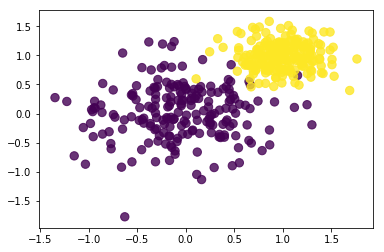

In [1]:
 ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')


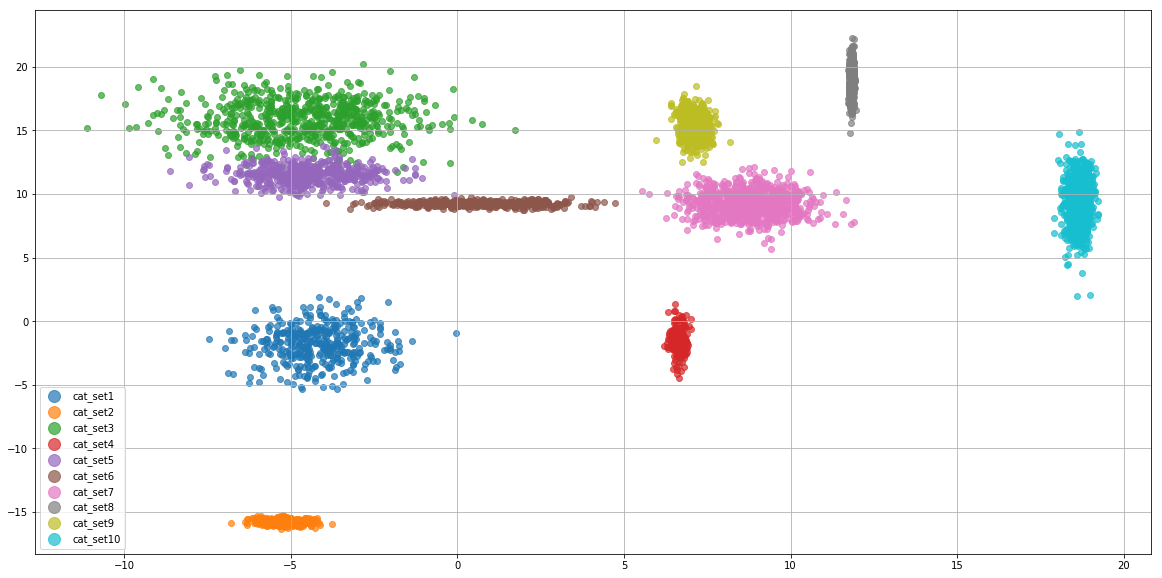

In [83]:
n_cat=10 
mean=20 
std=2 
lowest=100 
highest=1000 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

for i in range(n_cat):
    size=np.random.randint(lowest,highest)

    m1=np.random.uniform(-mean,mean)
    m2=np.random.uniform(-mean,mean)

    std1=np.random.uniform(0,std)
    std2=np.random.uniform(0,std)

    x = np.random.normal(m1,std1,size)
    y = np.random.normal(m2,std2,size)

    ax.scatter(x,y,alpha=0.7,label='cat_set'+str(i+1))

ax.grid(True)
ax.legend(markerscale=2)

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [4]:
df = pd.DataFrame(np.load('residuals_261.npy').item())

In [5]:
df

,residuals,distances
0,1.100000,16.000
1,-1.950000,6.300
2,-7.200000,3.400
3,-4.150000,8.400
4,-6.590000,1.700
5,-11.020000,4.400
6,-2.270000,0.600
7,-2.160000,19.000
8,-0.042857,3.300
9,0.128571,5.300


In [8]:
df_cleaned = df[np.absolute(df['residuals'])<2]
slope,intercept,_, _, _ = sp.stats.linregress(df['residuals'],df['distances'])

C:\Users\saret\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


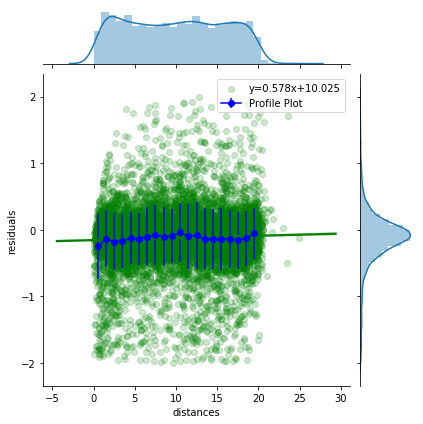

In [87]:

joint = sns.jointplot(x = "distances", y = "residuals", data = df, kind="reg",scatter_kws={'alpha':0.2},joint_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept),'color':'green'})

#getting the bin centers
nbin=20 #this is the number of blue points with the error bar
bin_edges = np.linspace(0,20,nbin+1)
central_points =(bin_edges[1:] + bin_edges[:-1])/2


#filling the array
y=np.array([df.loc[(df['distances'] >=bin_edges[i]) & (df['distances'] <bin_edges[i+1])]['residuals'].mean() for i in range(nbin)])
erry=np.array([df.loc[(df['distances'] >=bin_edges[i]) & (df['distances'] <bin_edges[i+1])]['residuals'].std() for i in range(nbin)])

#plotting profile
plt.errorbar(central_points,y,yerr=erry, label='Profile Plot',linewidth=1.5,color='blue',marker='o')
joint.ax_joint.legend()